# AEDARs and relation to patient age

<br>

I'm interested in AEDARs (anti-epileptic drug induced adverse reactions). 

Anti-epileptic drugs (AEDs) are given to patients to treat epilepsy or recurrent seizures. 

Adverse reactions are unwanted or harmful reactions after having taken a drug. 

Not all drugs, including AEDs, work the same in all patients, and thus may result in an adverse reaction. 

Moreover, not all epilepsies have the same disease etiology, which may influence the action of AEDs. 

What determines if a patient will have an AEDAR? What influences drug efficacy and toxicity? 


# Proof-of-concept notebook

I will choose one AEDAR, show the approach on the AEDAR, and then apply the approach to every AEDAR to view the distribution of AEDARs with a statistic that represents the dependence on age. 

<br>

# Outline

### [Question](#q)
### [Background](#background)
### [Data Description](#datadescription)
### [Data Processing](#dataprocessing)
### [Approach](#approach)
### [Visualizations during Approach](#viz)
### [n = 1](#1)
### [n = all](#all)

<br>
<hr>
<br>

## Question <a name="q"></a>

Is age a factor for determining if a patient will have an AEDAR? 

<br>

## Background <a name="background"></a>

Adverse drug reactions, including AEDARs, have been shown to be a [significant morbidity](http://jama.jamanetwork.com/article.aspx?doi=10.1001/jama.279.15.1200) in patients. Over the years many drugs have been [withdrawn](http://www.ncbi.nlm.nih.gov/pubmed/12534765) from the market due to adverse reactions. For example, withdrawn drugs include Phenylopropanolamine (Hemorragic stroke, 2000), Cisapride (drug interactions, 2000), and Bromfenac (hepatotoxicity, 1998). [Examples](http://www.ncbi.nlm.nih.gov/pubmed/21412202) of AEDARs, which unfortunately aren't included with particular AEDs here, include amnesia, sedation and drug interactions. In [children](http://www.ncbi.nlm.nih.gov/pubmed/26033949), other AEDARs include rash, nausea, and behavorial problems. Polypharmacy was also a frequent AEDAR in [children](http://www.ncbi.nlm.nih.gov/pubmed/26033949), particularly for valproate and carbamezapine. Particularly significant morbidities have been noted, for example children who have taken valproate have experienced [liver damage](http://doi.wiley.com/10.1002/lt.23965), which was shown to be associated with a mitochondrial gene mutation. 

Why do drugs act differently depending on age? Drugs can be said to have particular absorption, distribution, metabolism and excretion (ADME) properties. These ADME properties can differ significantly with the age of a patient due to differences in development. [For example](http://www.ncbi.nlm.nih.gov/pubmed/24310425), the stomach pH can change with development from birth through the first couple years of life, the surface area of the GI tract and other organs change through development which can affect absorption, and the blood-brain barrier is not yet mature in infancy and so drugs may have unwanted toxicity. 

<!-- Read and reference [this](https://www.ncbi.nlm.nih.gov/pubmed/24310425) and [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3044438/) -->

While drugs are noted to have different properties during development, often adverse drug reactions are only presented through [clinical experience](http://www.ncbi.nlm.nih.gov/pubmed/21121777) to manifest in patients in different age groups. Adverse reactions to drugs by patients are rarely, if at all, quantitatively shown to be different between older versus younger patients, and instead are given as observables in a patient population. However, risk factors for an ADR have been stated to include [age](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3950535/) 

Whether younger patients are at increased risk for certain ADRs has yet to be shown, especially for AEDARs that I'm interested in. AEDs have been shown to be [risk factors](https://www.ncbi.nlm.nih.gov/pubmed/28763499) for an ADR. Thus, investigating age dependence of AEDARs is important for identifying inappropriate drug use. 

<!--
age-dependent reporting [bias](https://www.ncbi.nlm.nih.gov/pubmed/28071845)
aed efficacy by [age](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3588149/)
-->

<br>

## Data Description <a name="datadescription"></a>

The data that I'm using is a modified version of **AEOLOUS** -- a curated dataset with standardized patient adverse drug reactions including age. This surveillance system contains **over 8 million reports** of **ADRs experienced by patients**, reported by patients, healthcare providers, pharma companies and others, **between 2004 to 2015** collected by the FDA. [Tatonetti and others](https://www.nature.com/articles/sdata201626) processed the dataset from the FDA into the curated, standardized dataset I'm using here. More statistics and data visualizations of the dataset can be found in this [presentation](../docs/pdf/20171205_TatonettiLab_LabPresentation_modified.pdf)

<br>

## Data Processing <a name="dataprocessing"></a>

First, load modules and set parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
import statsmodels.api as sm

/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Next, load and process the data

In [3]:
#read data
raw_master_age = pd.read_csv('../data/valproate_adr_sparse_matrix_master_age.csv.gz',index_col=0)
#fill NAs with 0
raw_master_age.fillna(0,inplace=True)
#display table
display(raw_master_age.tail())
#print some info
print('Reports: '+repr(len(np.unique(raw_master_age.index.values)))+'\n'+'AEDARs: '+repr(raw_master_age.shape[1]))

,Valproate_Abdominal.discomfort,Valproate_Abdominal.distension,Valproate_Abdominal.pain,Valproate_Abnormal.behavior,Valproate_Abnormal.blood.pressure,Valproate_Abnormal.bowel.sounds,Valproate_Abnormal.gait,Valproate_Abnormal.glucose.level,Valproate_Abnormal.glucose.tolerance.test,Valproate_Abnormal.liver.function,...,Valproate_Viral.hepatitis.C,Valproate_Visual.field.defect,Valproate_Visual.hallucinations,Valproate_Vitamin.D.deficiency,Valproate_Volubility,Valproate_Vomiting,Valproate_Weight.increased,Valproate_Wheezing,Valproate_Wound,master_age
id,,,,,,,,,,,,,,,,,,,,,
934370111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.62
934370111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.62
1016286510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.82
1016286510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.82
1016286510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.82


Reports: 32667
AEDARs: 899


**<u>tl;dr</u>**

**rows = reports**

**columns = AEDARs**

**values = presence, {1}, or absence, {0}, of an AEDAR for a report**

**y = age**

<br>

## Approach <a name="approach"></a>

To illustrate and explain the approach to address the hypotheses, I'll use one AEDAR, **Valproate_Seizure**, which is the association of having Seizures when taking Valproate.

First, I pull out the reports, AEDAR and ages

In [4]:
#column selection-independent variable
preds = raw_master_age['master_age']
#column selection-dependent variable
Y = raw_master_age.Valproate_Seizure.tolist()
#index selection-reports
index = raw_master_age.index.tolist()

Now the ages are duplicated, so let's see how many unique ages there are

In [6]:
len(np.unique(preds))

2635

That would be a large number of ages to test for association to the AEDAR...what if I just group reports by rounding to the nearest integer? This reduces the number of ages to a managable amount to check for associations while keeping the number of observations, or reports for that age, large.

In [7]:
#digit to round to
n=0
#convert to series after rounding
preds_rounded = pd.Series(np.round(preds.values,n))
#how many rounded ages?
len(np.unique(np.round(preds.values)))

102

That's better. Atleast more intuitive. 

Now, I assign each report to the rounded age

In [8]:
#make empty dataframe
mat = pd.DataFrame(columns=np.unique(preds_rounded),index=np.unique(index))
#fill in 0s for now
mat.fillna(0,inplace=True)
#copy dataframe to be filled
mat2 = mat.copy()
#fill copied dataframe with the AEDAR status of patient in report (had it? 1. Did not have it? 0)
for i,age in enumerate(preds_rounded):
    j = np.where(mat2.columns.isin([age]))[0]
    if i >= mat2.shape[0]:
        continue
    mat2.iat[i,j[0]] = 1

Groovy. Just to clarify, those reports with reported age within (0,1) are assigned age 0, within (1,2) for assigned age 1, and so on. 

Now what?

I want to ask if age of the patient associates with the occurrence of an AEDAR. 

In addressing this question, I want to investigate whether there might be different types of associations to age. For example, younger patients could be more associated to an AEDAR. The association to an AEDAR could be relatively constant for a range of patient ages. Or therev could a different type of relationship between age of the patient and whether they'll experience an AEDAR. Thus, we will look at a few transformations of age to determine different associations of AEDARs to patient-reported age.

To enumerate (non-exhaustive list) possibilities, 

* There could be a constant, linear relationship. This we look at with just **age** .

* There could be a nonlinear relationship such that the effect of having an AEDAR increases exponentially with age (the severity increases with age). This we look at with **age^2**.

* There could be another type of nonlinear relationship, where the effect of having the AEDAR is seen mostly towards younger patients, and then stagnates with increasing age. This is represented with **ln(age)** (we add 1 s.t. ln(age+1) just so that we don't take ln(0) which is undefined).

In [9]:
df = pd.DataFrame(columns=['AEDAR'])
df['age'] = preds_rounded.values
df['age^2'] = preds_rounded.values ** 2
df['ln(age)'] = np.log1p(preds_rounded.values)
df['AEDAR'] = Y
df['id'] = index
twos = df['AEDAR'].iloc[np.where(df['AEDAR'].isin([2]))[0]]
df['AEDAR'].iloc[np.where(df['AEDAR'].isin([2]))[0]] = [1]*len(twos.values)
df['AEDAR'] = df['AEDAR'].astype(np.object)
df['id'] = df['id'].astype(np.object)
df['age'] = df['age'].astype('int')
df['age^2'] = df['age^2'].astype('float')
df['ln(age)'] = df['ln(age)'].astype('float')
melted = pd.melt(df,id_vars=['AEDAR'],value_vars=['age','age^2','ln(age)'],var_name=['Age'])

/anaconda/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


So is it worth it to use a machine learning model? Yes, so we can see which coefficient, or which age transformation, is most predictive of AEDAR occurrence.

## Visualizations <a name="viz"></a>

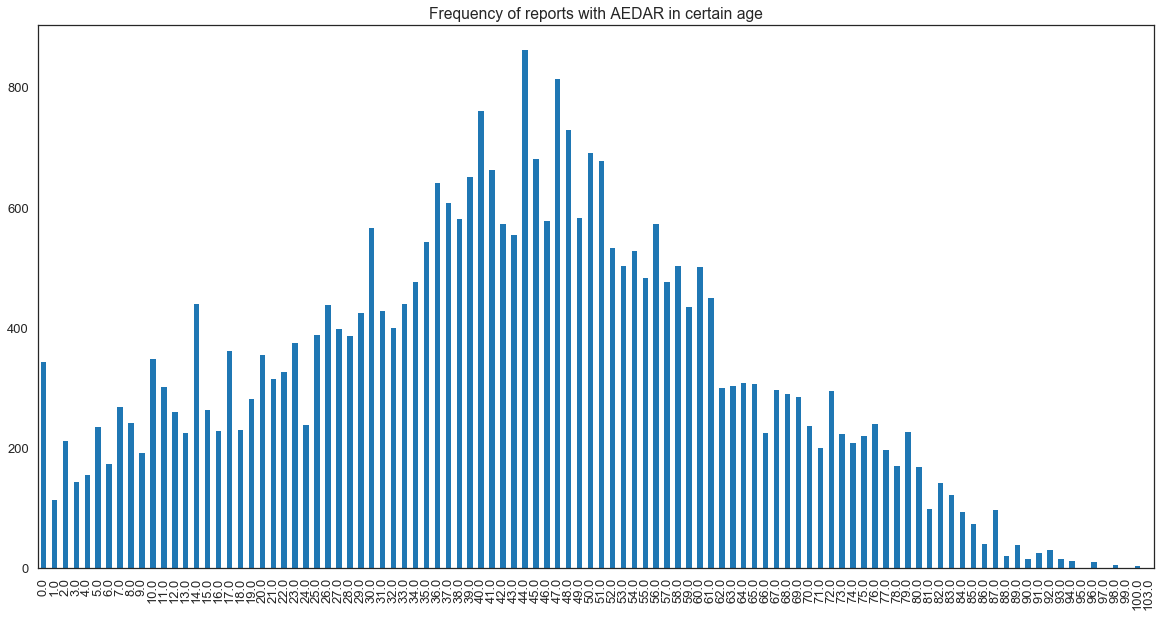

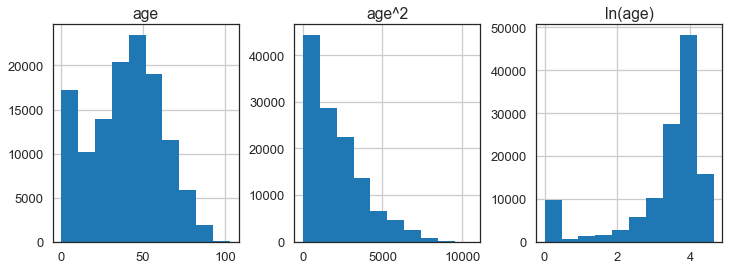

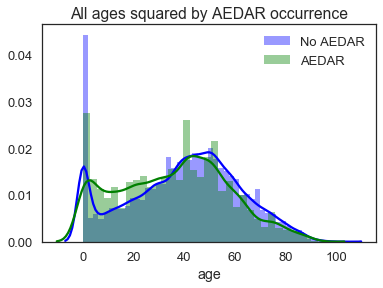

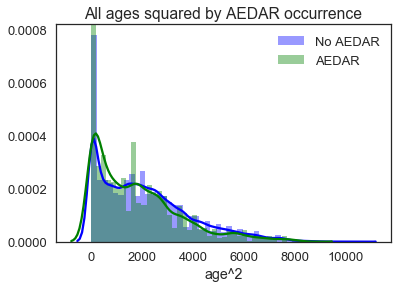

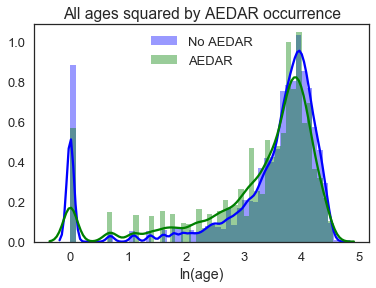

In [11]:
#bar chart of report number per rounded patient age
display(mat2.sum(axis=0).plot.bar(figsize=(20,10)))
plt.title("Frequency of reports with AEDAR in certain age")
plt.xticks(rotation=90)
plt.show()

#histogram of age transformations
df.hist(figsize=(12,4),layout=(1,3))
plt.show()

#overlapping histograms of age transformations per AEDAR status
x = df['age']
mask = df['AEDAR'] == 0
sns.distplot(x[mask],color="blue",label="No AEDAR")
mask = df['AEDAR'] == 1
sns.distplot(x[mask],color="green",label="AEDAR")
plt.title('All ages squared by AEDAR occurrence')
plt.legend()
plt.show()

x = df['age^2']
mask = df['AEDAR'] == 0
sns.distplot(x[mask],color="blue",label="No AEDAR")
mask = df['AEDAR'] == 1
sns.distplot(x[mask],color="green",label="AEDAR")
plt.title('All ages squared by AEDAR occurrence')
plt.legend()
plt.show()

x = df['ln(age)']
mask = df['AEDAR'] == 0
sns.distplot(x[mask],color="blue",label="No AEDAR")
mask = df['AEDAR'] == 1
sns.distplot(x[mask],color="green",label="AEDAR")
plt.title('All ages squared by AEDAR occurrence')
plt.legend()
plt.show()

Interesting, you can definitely see there being a difference in AEDAR positive cases vs. negative cases, particularly towards younger patients. The _age_ variable definitely shows higher frequency of AEDARs for younger patients. However, it's scrunched up and hard to see. The _age^2_ variable is also really hard to see. The _ln(age)_ shows the higher frequency of the AEDAR for patients of younger age because lower values of age are easier to see. 

## n = 1 <a name="1"></a>

Now I want to see if I can predict the AEDAR status using the age transformations.

In [12]:
y = df['AEDAR'].astype(np.int)
X = df.drop(['AEDAR','id'], axis=1, inplace=False)
#add . intercept
X['Intercept'] = 1.0
logit = sm.Logit(y,X)
# fit the model
result = logit.fit()
summary = result.summary()
display(summary)

Optimization terminated successfully.
         Current function value: 0.343674
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  AEDAR   No. Observations:               123663
Model:                          Logit   Df Residuals:                   123659
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Dec 2017   Pseudo R-squ.:                0.009989
Time:                        11:46:41   Log-Likelihood:                -42500.
converged:                       True   LL-Null:                       -42929.
                                        LLR p-value:                1.368e-185
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0635      0.003    -20.042      0.000      -0.070      -0.057
age^2          0.0004   2.85e-05     14.254      0.000       0.000       0.000
ln(age)        0.5622      0.027     21.020      0.000       0.510       0.615
Intercept     -2.3185      0.034    -68.700      0.000      -2.385      -2.252
==============================================================================
"""

I use the Logit classification function in the statsmodel package to predict the probability of the AEDAR based on the age-transformed variables. 

<br>

Interesting, at first glance we see there's a large positive coefficient for _ln(age)_. Let's put this data in a dataframe and plot it so we can see the estimates side-by-side and with confidence intervals. The p-value isn't very helpful here, since we have so much data (any occurrence will be significant, essentially).

In [13]:
def results_summary_to_dataframe(results,alpha=0.01):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int(alpha=alpha)[0]
    conf_higher = results.conf_int(alpha=alpha)[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

results_df = results_summary_to_dataframe(result)
results_df

,coeff,pvals,conf_lower,conf_higher
age,-0.063485,2.356389e-89,-0.071644,-0.055326
age^2,0.000406,4.228151e-46,0.000332,0.000479
ln(age),0.562163,4.277823e-98,0.493276,0.631051
Intercept,-2.318533,0.000000e+00,-2.405464,-2.231603


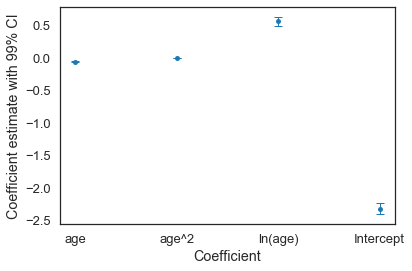

In [14]:
#make error bars using 99% confidence intervals
error = [results_df['coeff']-results_df['conf_lower'],results_df['conf_higher']-results_df['coeff']]
#make figure plot objects
fig, ax = plt.subplots()
#plot errorbar object
ax.errorbar([0,1,2,3],
             results_df['coeff'],
             yerr=error,
             marker='o',markersize=5,
             capsize=4,capthick=1,
             linewidth=0,elinewidth=1,
            ecolor=None)
#set discrete ticks
ax.set_xticks([0,1,2,3])
#relabel ticks with coefficient names
ax.set_xticklabels(results_df.index.values)
#label axes
plt.ylabel('Coefficient estimate with 99% CI')
plt.xlabel('Coefficient')
#show plot
plt.show()

How do we interpret this?

**age**: There is very little to no association of the reported age to the AEDAR occurrence. Same with **age^2**.

**ln(age)**: There is a positive association of the natural logarithm of age to the AEDAR occurrence. 

BTW, [this](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html) is a great tutorial of using the Logit function and interpreting Logistic regression results. 

Something interesting to look at is the **Odds Ratio**, which we can get by exponentiating our coefficients/confidence intervals.

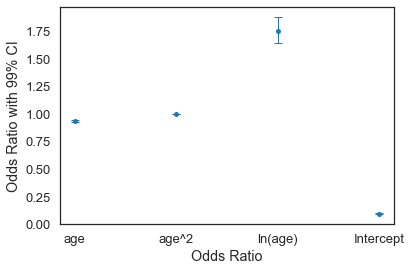

In [15]:
or_df = results_df[['coeff','conf_lower','conf_higher']]
or_df = np.exp(or_df)
fig, ax = plt.subplots()
error = [or_df['coeff']-or_df['conf_lower'],or_df['conf_higher']-or_df['coeff']]
ax.errorbar([0,1,2,3],
             or_df['coeff'],
             yerr=error,
             marker='o',markersize=5,
             capsize=4,capthick=1,
             linewidth=0,elinewidth=1,
            ecolor=None)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(results_df.index.values)
plt.ylabel('Odds Ratio with 99% CI')
plt.xlabel('Odds Ratio')
plt.show()

This might be more interpretable. 

**ln(age)** This seems to say that reports with age transformation by the natural logarithm show an odds of 1.75, give or take, to experience Seizure after taking Valproate. So, odds are, a younger patient would experience Seizures after taking Valproate (take with a large grain of salt!). 

## n = all <a name="all"></a>

Instead of using just one AEDAR like before using Valproate\_Seizure, I'll iterate through all Valproate\_AdverseReactions, and retrieve the estimate of interest. From above, I think I'll want to grab the coefficient for ln(age) since that tests association with younger patients more than older patients. Then I'll view that distribution of Odds Ratios.

Let's first see if I were to do a for loop, this would work. I'll give a number for the AEDAR column in the matrix to do the odds ratio calculation first. This takes a lil' bit...this can be optimized...feel free to optimize!

/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np

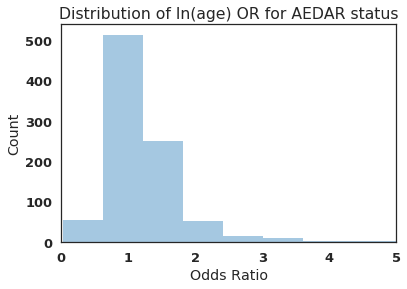

In [17]:
#set stage-I'll leave this as an "exercise" to understand how the code works aka I don't vwant to annotate this all haha
X = df.drop(['AEDAR','id'], axis=1, inplace=False)
X = df[['ln(age)']]
X['Intercept'] = 1.0
aedars = raw_master_age.columns.tolist()
aedars.remove('master_age')
loop = pd.DataFrame(index=aedars,columns=['Odds.Ratio',"conf_higher","conf_lower"])
#iterate
sums = []
multiclass = []
logitfiterror = []
for i in range(0,len(aedars)):
    df['AEDAR'] = raw_master_age.iloc[:,i].tolist()
    if len(np.unique(df['AEDAR']))>2:
        multiclass.append(i)
        next
    twos = df['AEDAR'].iloc[np.where(df['AEDAR'].isin([2]))[0]]
    df['AEDAR'].iloc[np.where(df['AEDAR'].isin([2]))[0]] = [1]*len(twos.values)
    y = df['AEDAR'].astype(np.int)
    sums.append(np.mean(y))
    logit = sm.Logit(y,X)
    try:
        result = logit.fit(disp=0)
    except:
        'Logit fit Error'
        logitfiterror.append(i)
    results_df = results_summary_to_dataframe(result)
    lnage = np.exp(results_df.loc['ln(age)'].values[[0,3,2]])
    loop.loc[raw_master_age.columns[i]] = (lnage).tolist()
sums = pd.Series(sums,index=aedars)
loop['Prop'] = sums

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}
matplotlib.rc('font', **font)
sns.distplot(loop['Odds.Ratio'].values,norm_hist=False,bins=200,kde=False)
plt.title('Distribution of ln(age) OR for AEDAR status')
plt.xlabel('Odds Ratio')
plt.ylabel('Count')
plt.xlim(0,5)
plt.show()

I intentionally cut the range of Odds Ratios shown to show that the central tendency is towards 1 or a bit over 1, with a longer right tail. There are large Odds Ratios that may indicate larger odds for younger patients to get these AEDARs

In [18]:
loop.sort_values(inplace=False,ascending=False,by='Odds.Ratio').query('conf_lower>2').head()

,Odds.Ratio,conf_higher,conf_lower,Prop
Valproate_Complete.atrioventricular.block,119.715,278.402,51.4781,0.001593
Valproate_Fracture.of.proximal.end.of.femur,57.6506,103.771,32.0282,0.002814
Valproate_Alzheimer's.disease,17.4329,30.9847,9.80823,0.002167
Valproate_Subarachnoid.hemorrhage,9.45662,17.7123,5.0489,0.001488
Valproate_Malignant.neoplastic.disease,5.94809,10.0392,3.52415,0.001755


And there are small Odds Ratios that can indicate low odds for younger patients to get these AEDARs

In [19]:
loop.sort_values(inplace=False,ascending=False,by='Odds.Ratio').query('conf_higher<0.5').head()

,Odds.Ratio,conf_higher,conf_lower,Prop
Valproate_Tension,0.45897,0.487712,0.431923,0.005232
Valproate_Multiple.congenital.cysts.of.kidney,0.432306,0.49053,0.380992,0.001278
Valproate_Anhedonia,0.419296,0.434053,0.40504,0.017992
Valproate_Autistic.disorder,0.379238,0.426768,0.337001,0.001771
Valproate_Loss.of.job,0.33057,0.356585,0.306452,0.005555


We can also see, as expected, that the confidence interval for the Odds Ratios get's larger as the Odds Ratio increases. The red line shows how the proportion of positive (1) AEDAR cases doesn't associate with the width of the interval, but rather varies a lot as the odds ratio is around 0. 

/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


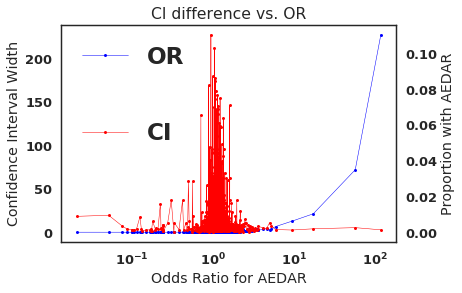

In [20]:
loop.sort_values(inplace=True,ascending=True,by='Odds.Ratio')
x = loop['Odds.Ratio'].tolist()
y = (loop['conf_higher'] - loop['conf_lower']).tolist()
prop = loop['Prop']

fig, ax1 = plt.subplots()

ax1.plot(x,y,color='blue',linewidth=0.5,marker='o',markersize=3,label='OR')
ax1.set_ylabel('Confidence Interval Width')
ax1.set_xlabel('Odds Ratio for AEDAR')
ax1.legend(fontsize='xx-small')

ax2 = ax1.twinx()
ax2.plot(x,prop,color='red',linewidth=0.5,marker='o',markersize=3,label='CI')
ax2.set_ylabel('Proportion with AEDAR')
ax2.legend(loc='center left',fontsize='xx-small')

plt.title('CI difference vs. OR')
plt.xscale('log')
plt.show()

**There's a lot more to be done or that can be done differently. Also, there's other questions/hypotheses to be pursued with this data.**

**This is ongoing work and is not complete. With that in mind, please be respectful and this is to be an example of these kinds of notebooks.**

**Feel free to fork and continue/create an analysis!**